# **DL: RNN**

Dong Gyun Ko <br/>
last Updated: july 30, 2022

In [1]:
# !pip install yfinance

In [2]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as plt

# data source
import yfinance as yf

# tensorflow
import tensorflow as tf

# import os
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# os.chdir('/content/gdrive/MyDrive/Colab_Notebooks/data')

## **1. data**

In [4]:
# import sample data

# MSFT stock price
df_MSFT = yf.download('MSFT', start="1990-01-01", end="2022-05-31")
df_MSFT['ln_Close'] = np.log(df_MSFT['Close'])
df_MSFT['r_Close'] = df_MSFT['Close']-df_MSFT['Close'].shift(1)

df_MSFT = df_MSFT[['Close', 'ln_Close', 'r_Close']]
df_MSFT.dropna(inplace=True)

df = df_MSFT['Close'].values

[*********************100%***********************]  1 of 1 completed


C:\Users\geodo\AppData\Local\Temp\ipykernel_15040\3391269144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MSFT.dropna(inplace=True)


In [5]:
df

array([  0.61979198,   0.63802099,   0.62239599, ..., 262.51998901,
       265.8999939 , 273.23999023])

In [6]:
df.shape

(8165,)

## 2. **LSTM**

In [7]:
# LSTM

class RNN:

    def __init__(self, n_samples, stride, n_step, n_input, n_lstm1, n_lstm2, n_hidden, n_output, epoch):

        self.n_samples = n_samples

        self.stride = stride

        self.n_step = n_step
        self.n_input = n_input

        # LSTM shape
        self.n_lstm1 = n_lstm1
        self.n_lstm2 = n_lstm2

        # fully connected
        self.n_hidden = n_hidden
        self.n_output = n_output

        self.epoch = epoch

    def df_set(self):

        train_x_list = []
        train_y_list = []

        for i in range(self.n_samples):

            train_x = df[i*self.stride:i*self.stride + self.n_step*self.n_input]
            train_x = train_x.reshape(self.n_step, self.n_input)
            train_x_list.append(train_x)

            train_y = df[i*self.stride + self.n_step*self.n_input:i*self.stride + self.n_step*self.n_input + self.n_output]
            train_y_list.append(train_y)

        train_feature = np.array(train_x_list)
        train_label = np.array(train_y_list)

        test_df = df[1000:1000 + self.n_step*self.n_input]
        test_df = test_df.reshape(1, self.n_step, self.n_input)

        return train_feature, train_label, test_df

    def LSTM(self):

        lstm_network = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(self.n_step, self.n_input)),
                                                   tf.keras.layers.LSTM(self.n_lstm1, return_sequences=True),
                                                   tf.keras.layers.LSTM(self.n_lstm2),
                                                   tf.keras.layers.Dense(self.n_hidden),
                                                   tf.keras.layers.Dense(self.n_output)
                                                   ])

        lstm_network.summary()

        lstm_network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

        lstm_network.fit(self.df_set()[0], self.df_set()[1], epochs=self.epoch)

        test_pred = lstm_network.predict(self.df_set()[2]).ravel()
        test_label = df[1000:1000 + self.n_step*self.n_input + self.n_input]

        plt.figure(figsize=(10, 6))

        plt.plot(np.arange(0, self.n_step*self.n_input + self.n_input), test_label, 'b', label='ground truth')
        plt.plot(np.arange(self.n_step*self.n_input, self.n_step*self.n_input + self.n_input), test_pred, 'r', label='prediction')
        
        temp = np.array([test_label])

        plt.vlines(self.n_step*self.n_input, ymin=np.min(temp), ymax=np.max(temp), colors='r', linestyles='dashed')
        plt.legend(fontsize=15, loc='upper left')
        plt.xlim(0, len(test_label))

        fig1 = plt.show()

        return fig1


instance = [RNN(5000, 1, 10, 100, 100, 100, 100, 100, 500)]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 181,000
Trainable params: 181,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
157/157 [==============================] - 4s 9ms/step - loss: 169.1068 - mse: 169.1068
Epoch 2/500
157/157 [==============================] - 1s 9ms/step - loss: 30.3966

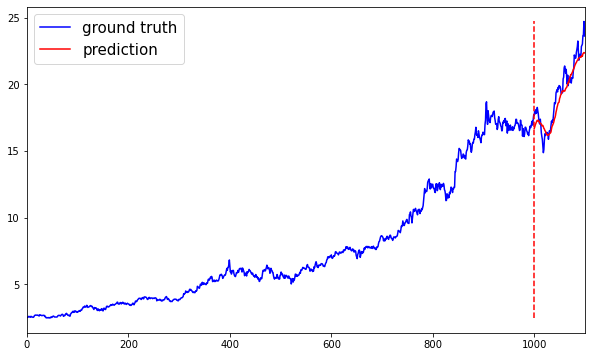

In [8]:
instance[0].LSTM()

## **3. references**

* https://i-systems.github.io/teaching/DL/iNotes_tf2/17_RNN_tf2.html <br/>